# Analyzing Movie Sentiments

Movies released over the years have been a way to help human mind escape their mundane life. While serving as a source of entertainment, a movie’s rating tells us about the success or failure, and a description of the movie gives us an insight into what to expect. While we can understand what to expect from the movie, how does it correlated to the audience reaction?

Sentiment Analysis [1], also known as opinion mining is a major topic in machine learning which aims to capture the subjective information from textual basis. Sentiment analysis is an application of natural language processing (NLP) technologies that train computer software to understand text in ways similar to humans. NLP aims to subjectively comprehend texts as being positive, negative or neutral. Some models may even be used to classify as sad, joy, happy, and other human emotions.

This project aims to build a comprehensive sentiment analysis on over 16k movie descriptions and correlate the findings with Metacritic ratings. The aim is to understand the effect of movie description on the audience reaction.

## Methodology

The project will utilize Natural Language Processing (NLP) technique to analyze the movie descriptions. Of the many NLP Python libraries available, this project will use the Hugging Face Transformer [2]. Hugging Face is most notable for its transformers library built for natural language processing applications. Its Python package contains open-source implementations of trans
former models for text, image, and audio tasks. It is compatible with the PyTorch, TensorFlow and JAX deep learning libraries and includes implementations of notable models like BERT and GPT-2 [3]. Since we are going to be taking an unsupervised learning approach, we have found the pre-trained model for these transformers to be helpful for our analysis.

The analysis will be carried out in different dimensions:
1. **Sentiment Trend**: Study how the sentiment in movie descriptions has evolved over the decades, and whether there have been significant shifts.
2. **Director’s Influence on Sentiment**: Investigate whether certain directors are associated with more positively or negatively described movies, thus assessing the impact of directorial influence on public sentiment.
3. **Critical Response Sentiment Analysis**: Similar to the Director’s influence, this study will involve correlating the Metacritic rating with sentiment scores, and determine if a positive description aligns with the higher critical score. This can be an excellent provider of future predictions of movies.

## Data Collection and Pre-processing

### Data Source

The source of the data is from Kaggle [3]. The dataset contains detailed information on over 16,000 movies released between 1910 and 2024, along with their corresponding Metacritic ratings. The key features include: Title, Release Date, Description, Rating, Number of Persons Voted, Directed by, Written by, Duration and Genres. With Sentiment Analysis, we could be looking at how the movies fair against directors, writers, duration, number of people voted, among other things.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import random

In [2]:
# Read data into dataframe and display first five rows

data = pd.read_csv('16k_Movies.csv')
data.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


### Data Pre-processing

#### Check the number of data points and columns in the dataset

In [3]:
print(f'Number of data points = {data.shape[0]}')
print(f'Number of columns = {data.shape[1]}')
print(list(data.columns))

Number of data points = 16290
Number of columns = 10
['Unnamed: 0', 'Title', 'Release Date', 'Description', 'Rating', 'No of Persons Voted', 'Directed by', 'Written by', 'Duration', 'Genres']


#### Drop the column named 'Unnamed 0' from the dataset as it provides no value to the dataset.

In [4]:
data.drop("Unnamed: 0", axis=1, inplace = True)

#### Check to see if dataset has missing or null values

In [5]:
def missing_value_report(dataset):
    print(f'Missing Value Report\n')
    for column in data.columns:
        missing_values = np.sum(data[column].isna())
        print(f'{column}')
        print(f'Number of missing values = {missing_values}\n')

missing_value_report(data)

Missing Value Report

Title
Number of missing values = 0

Release Date
Number of missing values = 0

Description
Number of missing values = 0

Rating
Number of missing values = 3444

No of Persons Voted
Number of missing values = 3461

Directed by
Number of missing values = 7

Written by
Number of missing values = 963

Duration
Number of missing values = 13

Genres
Number of missing values = 5



#### Find the data points with missing directors and store them in a list.

In [6]:
missing_director = []
for ind, director in enumerate(list(data['Directed by'])):
    if pd.isna(director):
        missing_director.append(ind)

#### Fill in certain values from internet

Since there are only 7 titles with missing directors, they can be filled by doing a simple Google search.

In [7]:
data.loc[data['Title'] == 'Apocalypse Now Redux', 'Directed by'] = 'Francis Ford Coppola'
data.loc[data['Title'] == 'The Harder They Come', 'Directed by'] = 'Perry Henzell'
data.loc[data['Title'] == 'The Godfather Coda: The Death of Michael Corleone', 'Directed by'] = 'Francis Ford Coppola'
data.loc[data['Title'] == 'The Cotton Club Encore', 'Directed by'] = 'Francis Ford Coppola'
data.loc[data['Title'] == 'Once Upon a Deadpool', 'Directed by'] = 'David Leitch'

Find the data points with missing genres and store them in a list.

In [8]:
missing_genre = []
for ind, genre in enumerate(list(data['Genres'])):
    if pd.isna(genre):
        missing_genre.append(ind)

Since there are only 5 titles with missing genres, they can also be filled by doing a simple Google search.

In [9]:
data.loc[data['Title'] == 'Apocalypse Now Redux', 'Genres'] = 'Adventure'
data.loc[data['Title'] == 'The Godfather Coda: The Death of Michael Corleone', 'Genres'] = 'Crime'
data.loc[data['Title'] == 'The Cotton Club Encore', 'Genres'] = 'Crime'
data.loc[data['Title'] == 'Once Upon a Deadpool', 'Genres'] = 'Action'
data.loc[data['Title'] == 'À cause d\'un garçon', 'Genres'] = 'Comedy'

#### Drop columns with null values

Next we'll drop any rows with features that have null values and check again to see if there are any missing values that have been missed.

In [10]:
data.dropna(axis = 0, inplace = True)
missing_value_report(data)

Missing Value Report

Title
Number of missing values = 0

Release Date
Number of missing values = 0

Description
Number of missing values = 0

Rating
Number of missing values = 0

No of Persons Voted
Number of missing values = 0

Directed by
Number of missing values = 0

Written by
Number of missing values = 0

Duration
Number of missing values = 0

Genres
Number of missing values = 0



#### Check and fix data types

Next we check the data types.

In [11]:
data.dtypes

Title                   object
Release Date            object
Description             object
Rating                 float64
No of Persons Voted     object
Directed by             object
Written by              object
Duration                object
Genres                  object
dtype: object

I noticed the data types for certain columns were not as expected, for example the Released data were not of DateTime category, and Number of People voted were not numerical. There were also certain values missing. The missing values were mainly in the ratings column, and thus for the sake of analysis they were removed. Another observation we made was that there were duplicate data points. The duplicate data points were also dropped.

We see that `Release Date`,'No of Persons Voted' and 'Duration' are object types. Convert them to respective types. Additionally it seems some values in 'No of Persons Voted' are written as '4,102'. So I will replace the commas, then convert to numeric. Last, I convert the duration to minutes and drop any duplicate rows in the dataset.

In [12]:
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['No of Persons Voted'] = data['No of Persons Voted'].replace(',', '', regex=True)
data['No of Persons Voted'] = pd.to_numeric(data['No of Persons Voted'])
data['Directed by'] = data['Directed by'].str.replace(r'\s+', ' ', regex=True)

# Change duration to minutes
def convert_to_minutes(duration):
    match = re.match(r'(?:(\d+) h)?\s*(?:(\d+) m)?', duration)
    if not match:
        return np.nan
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes

data['Duration'] = data['Duration'].apply(convert_to_minutes)
data = data[data['Duration'] > 0]
data.drop_duplicates(keep = 'first', inplace = True)

#### Select main genre category

For the sake of analysis, we have selected only the first genre of the movie, classifying them to be the main category. For example, a movie may be a Drama, Mystery, Romance, but the prominent defining genre of the movie would be that it is a Drama.

In [13]:
data['Genre'] = data['Genres'].apply(lambda gen: gen.split(',')[0] if isinstance(gen, str) else None)
num_genre = pd.unique(data['Genre'])
print(f'Number of unique genres = {len(num_genre)}')
print(num_genre)

Number of unique genres = 20
['Drama' 'Crime' 'Adventure' 'Comedy' 'Biography' 'Action' 'Animation'
 'Documentary' 'Thriller' 'Horror' 'Unknown' 'Fantasy' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Family' 'Music' 'War' 'History']


For the 'Unknown' genre, we take its second defining genre.

In [14]:
data.loc[data['Genre'] == 'Unknown', 'Genre'] = data.loc[data['Genre'] == 'Unknown', 'Genres'].apply(lambda x: x.split(',')[1] if isinstance(x, str) else None)
num_genre = pd.unique(data['Genre'])
print(f'Number of unique genres = {len(num_genre)}')
print(num_genre)

Number of unique genres = 19
['Drama' 'Crime' 'Adventure' 'Comedy' 'Biography' 'Action' 'Animation'
 'Documentary' 'Thriller' 'Horror' 'Fantasy' 'Musical' 'Mystery' 'Romance'
 'Sci-Fi' 'Family' 'Music' 'War' 'History']


#### Reset index

Finally, I reset the index and check the shape and contents of our processed dataset.

In [15]:
data.reset_index(drop = True, inplace = True)
display(data.shape)
display(data.dtypes)

(11391, 10)

Title                          object
Release Date           datetime64[ns]
Description                    object
Rating                        float64
No of Persons Voted             int64
Directed by                    object
Written by                     object
Duration                        int64
Genres                         object
Genre                          object
dtype: object

## Analysis

The data set was analyzed using the Hugging Face Transformer. This is a publicly available, pre-trained model that includes pipelines for transforming data and producing valuable results for analysis. The model used has been specifically been used for movie reviews analysis [4]. The model was trained and tested on a supervised data set. The dataset used was “Large Movie Review Dataset” provided by the Stanford University and specifically said to be used to train Hugging Face Transformers [5]. Their dataset contained 25000 training points and 25000 testing point. For our analysis however they were combined and then split randomly to have 80:20 ratio for training and testing respectively. [Table 1] displays the evaluation metrics. Thus we can see with an accuracy score of 93.1%, this model can be now used with our data set.

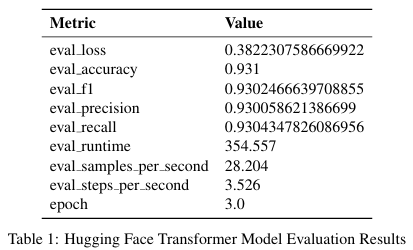

After the data set was cleaned and pre-processed, the Hugging Face Transformer was able to take the data set and sign sentiments based on the movie description. To have a better understanding of the sentiment, the labels assigned were either “Positive” or “Negative”. The label “Neutral” was not taken into consideration, and any “Neutral” label was considered “Negative”. The model also assigned a confidence label to the sentiment to indicate the model’s certainty in its predictions. Finally, the sentiment labels and scores were merged back into the main dataset for a comprehensive analysis.

### Links to Huggingface and pipeline

1. https://huggingface.co/blog/sentiment-analysis-python
2. https://huggingface.co/sarahai/movie-sentiment-analysis

#### Import Huggingface pipeline

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch 

#print(torch.cuda.is_available()) --> Should return True if GPU is available

We will use the model = "sarahai/movie-sentiment-analysis", which seems to be the most downloaded model.
This model is a distilbert-base-uncased fine-tuned for sentiment analysis on the IMDb movie review dataset. 
The model is trained to classify movie reviews into positive or negative sentiment.

In [17]:
model_name = 'sarahai/movie-sentiment-analysis'

#### Load pre-trained sentiment classification model

In [18]:
sentiment_tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_classifier = pipeline('sentiment-analysis', model = sentiment_model, tokenizer = sentiment_tokenizer, device = 0)

# device = 0 will use GPU instead of CPU. Will make the analysis faster.

#### Training and testing the model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Following dataset was taken from “Large Movie Review Dataset” provided by the Stanford University and specifically said to be used to train Hugging Face Transformers.

In [20]:
splits = {'train': 'plain_text/train-00000-of-00001.parquet', 
          'test': 'plain_text/test-00000-of-00001.parquet', 
          'unsupervised': 'plain_text/unsupervised-00000-of-00001.parquet'}

df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
print(df)

                                                    text  label
0      I rented I AM CURIOUS-YELLOW from my video sto...      0
1      "I Am Curious: Yellow" is a risible and preten...      0
2      If only to avoid making this type of film in t...      0
3      This film was probably inspired by Godard's Ma...      0
4      Oh, brother...after hearing about this ridicul...      0
...                                                  ...    ...
24995  A hit at the time but now better categorised a...      1
24996  I love this movie like no other. Another time ...      1
24997  This film and it's sequel Barry Mckenzie holds...      1
24998  'The Adventures Of Barry McKenzie' started lif...      1
24999  The story centers around Barry McKenzie who mu...      1

[25000 rows x 2 columns]


This is a labelled dataset composed of training, testing and an unsupervised set of data to be used for validation. Here we see that the training and testing dataset is comprised of 25,000 data points. Now for our project, we will first combine them and split them randomly into 80:20 ration for training and testing.

In [21]:
train_df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/" + splits["test"])

In [22]:
combined_df = pd.concat([train_df, test_df]).reset_index(drop=True)

In [23]:
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

Next we will be training our ML model with the labelled dataset. First we need to transform DataFrames to Hugging Face Datasets 

In [24]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df) 
test_dataset = Dataset.from_pandas(test_df)

#### Tokenize the dataset

In [25]:
def tokenize_function(examples):
    return sentiment_tokenizer(examples['text'], padding='max_length', truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

#### Define evaluation metrics

In [26]:
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

#### Training hyperparameters

In [27]:
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer")

#### Load model evaluation parameter

Trainer does not automatically evaluate model performance during training. You’ll need to pass Trainer a function to compute and report metrics. The 🤗 Evaluate library provides a simple accuracy function you can load with the evaluate.load (see this quicktour for more information) function:

In [28]:
import evaluate
metric = evaluate.load("accuracy")

#### Train the model

__Quick warning:__ The model takes about 3 hours to train.

In [29]:
import time
start_time = time.time()
from transformers import Trainer
trainer = Trainer(
    model=sentiment_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
elapsed_time = (time.time() - start_time) / 3600
print(f'Time elapsed = {elapsed_time} hours')

Step,Training Loss
500,0.367100
1000,0.332500
1500,0.327300
2000,0.300700
2500,0.300800
3000,0.285200
3500,0.262600
4000,0.262300
4500,0.271600
5000,0.260500


Time elapsed = 2.439563443594509 hours


#### Dataset pre-processing Part 2

One issue that may arise with Hugging Face is that most transformer models have a max sequence length of 512. And since we have very long descriptions, one way of dealing with this is to break the long description into chunks and analyze each window. Determine the overall sentiment and take the max score.

In [30]:
data_description = data[['Title', 'Description']].copy()
data_description.head()

,Title,Description
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...
2,The Conformist,"Set in Rome in the 1930s, this re-release of B..."
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec..."


In [31]:
def chunk_sentiment_score(description, window_size = 512, stride = 256):
    # Break the long description into overlapping windows
    windows = [
        description[i:i+window_size] 
        for i in range(0, len(description), stride)
    ]

    # Analyze sentiment for each window
    window_sentiments = [sentiment_classifier(window)[0] for window in windows]

    # Aggregate sentiments
    negative_windows = sum(1 for sent in window_sentiments if sent['label'] == 'LABEL_0')
    positive_windows = sum(1 for sent in window_sentiments if sent['label'] == 'LABEL_1')

    # Determine overall sentiment
    if positive_windows > negative_windows:
        return {
            'label': 'LABEL_1', 
            'score': max(sent['score'] for sent in window_sentiments if sent['label'] == 'LABEL_1')
        }
    elif negative_windows >= positive_windows:
        return {
            'label': 'LABEL_0', 
            'score': max(sent['score'] for sent in window_sentiments if sent['label'] == 'LABEL_0')
        }
    # else:
    #     return {
    #         'label': 'NEUTRAL', 
    #         'score': 0.5
    #     }


def extract_sentiment_scores(description):

    # If the description is not str, just return it is Neutral with a score of 0.5
    # if not isinstance(description, str):
    #     return {'label': 'Neutral', 'score': 0.5}

    max_length = 512

    if len(description) <= max_length:
        result = sentiment_classifier(description)[0]
    elif len(description) > max_length:
        result = chunk_sentiment_score(description)

    # For some reason, the positive sentiment is labeled as LABEL_1, negative sentiment is labeled as LABEL_0
    if result['label'] == 'LABEL_0':
        result['label'] = 'Negative'
    elif result['label'] == 'LABEL_1':
        result['label'] = 'Positive'

    return result

Example with positive sentiment:

In [32]:
print(f'''Movie Title: {data_description['Title'][332]}''')
print('\n')
print(f'''Description: {data_description['Description'][332]}''')
print('\n')
print(extract_sentiment_scores(data_description['Description'][332]))

Movie Title: If Beale Street Could Talk


Description: Set in early-1970s Harlem, If Beale Street Could Talk is a timeless and moving love story of both a couple's unbreakable bond and the African-American family's empowering embrace, as told through the eyes of 19-year old Tish Rivers (KiKi Layne).  A daughter and wife-to-be, Tish vividly recalls the passion, respect and trust that have connected her and her artist fiancé Alonzo Hunt, who goes by the nickname Fonny (Stephan James).  Friends since childhood, the devoted couple dream of a future together but their plans are derailed when Fonny is arrested for a crime he did not commit. Tish knows that Fonny is innocent, and is mindful that his good friend Daniel Carty (Brian Tyree Henry) has only recently been freed after an unjust incarceration.  While Fonny's mother (Aunjanue Ellis) clings to piety and his father (Michael Beach) grapples with feelings of powerlessness, Tish's earthy father Joseph (Colman Domingo) and fierce older sist

Now we will add the label to the data_description DataFrame

In [33]:
data_description.loc[:, 'Sentiment'] = data_description['Description'].apply(lambda x : extract_sentiment_scores(x)['label'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


And then add the score to the data_description DataFrame

In [34]:
data_description.loc[:, 'Sentiment Score'] = data_description['Description'].apply(lambda x : extract_sentiment_scores(x)['score'])

Final Dataset:

In [35]:
data_description.head()

,Title,Description,Sentiment,Sentiment Score
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,Positive,0.999801
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",Positive,0.999763


## Results

### Genre Sentiment Analysis

The first thing that was looked into is to observe how the sentiments generated faired with the genre. Each movie was either represented by a single genre or categorized into multiple genres. There were 23 unique genres that the movies were categorized into. We decided to work on categorizing the movies into multiple genres and analyze the sentiments from there on. Figure 1 displays the result.

Getting the dataset ready for this specific analysis

In [36]:
genre_sentiment2 = pd.merge(data_description, data[['Title', 'Genres']], on = 'Title')
genre_sentiment2.head()

,Title,Description,Sentiment,Sentiment Score,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793,Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,"Drama,Mystery,Romance"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626,Drama
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,Positive,0.999801,Drama
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",Positive,0.999763,"Drama,History"


Explode the genre column

In [37]:
genre_sentiment2['Genres'] = genre_sentiment2['Genres'].str.split(',')
genre_sentiment2 = genre_sentiment2.explode('Genres')
genre_sentiment2.head()

,Title,Description,Sentiment,Sentiment Score,Genres
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793,Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,Drama
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,Mystery
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,Romance
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626,Drama


Group by genre and sentiment

In [38]:
genre_sentiment_dist2 = genre_sentiment2.groupby(['Genres', 'Sentiment']).size()

Normalize to percentages

In [39]:
genre_sentiment_dist_pct2 = (genre_sentiment_dist2.unstack(level = 1)).div((genre_sentiment_dist2.unstack(level = 1)).sum(axis=1), axis=0) * 100

Visualize

<Figure size 4000x4000 with 0 Axes>

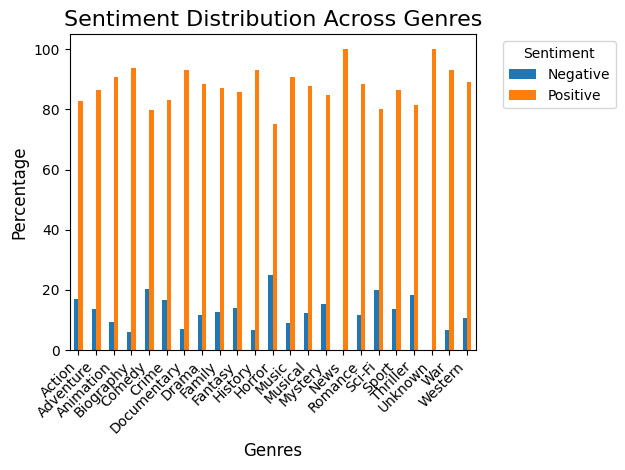

In [63]:
plt.figure(figsize=(40, 40))
genre_sentiment_dist_pct2.plot(kind='bar', stacked=False)
plt.title('Sentiment Distribution Across Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Sentiment Distribution Across Genres.png')
plt.show()

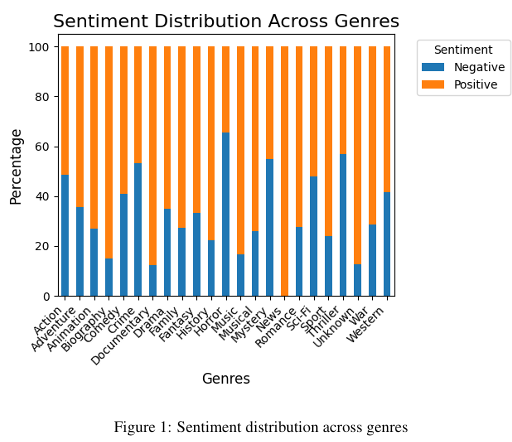

In [41]:
print(f'The News genre movie: {genre_sentiment2[genre_sentiment2['Genres'] == 'News']['Title'].values[0]}')
print('\n')
print(f'Let\'s look at the description')
print(f'{genre_sentiment2[genre_sentiment2['Genres'] == 'News']['Description'].values[0]}')

The News genre movie: Cameraperson


Let's look at the description
A boxing match in Brooklyn; life in postwar Bosnia and Herzegovina; the daily routine of a Nigerian midwife; an intimate family moment at home: these scenes and others are woven into Cameraperson, a tapestry of footage collected over the twenty-five-year career of documentary cinematographer Kirsten Johnson. Through a series of episodic juxtapositions, Johnson explores the relationships between image makers and their subjects, the tension between the objectivity and intervention of the camera, and the complex interaction of unfiltered reality and crafted narrative. A hybrid work that combines documentary, autobiography, and ethical inquiry, Cameraperson is both a moving glimpse into one filmmaker’s personal journey and a thoughtful examination of what it means to train a camera on the world. [Janus Films]


Here we see that movies that were generally considered positive were in a larger quantity over the decades of movie releases. It makes obvious sense that cheerful and joyous movies (that is movies with genre like Comedy, Romance) have a greater positive sentiment than movies with a darker tone (like Crime, Horror). Only a few movies crossed the threshold of 50% negative sentiment, suggesting that movies are generally intended to have a positive vibe.

### Exploring Correlation between sentiments and movie ratings

For analysis looking into how the ratings correlate with sentiments, the ratings were categorized into bins, for example bin (0, 1], bin (1, 2], etc.

Getting the dataset ready for this specific part of the analysis

In [42]:
ratings_sentiment = pd.merge(data_description, data[['Title', 'Rating']], on = 'Title')
ratings_sentiment.head()

,Title,Description,Sentiment,Sentiment Score,Rating
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793,7.4
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,8.3
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626,7.3
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,Positive,0.999801,8.1
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",Positive,0.999763,7.8


Finding the max and min rating

In [43]:
print(f'The highest rating a movie has received is {max(ratings_sentiment['Rating'])}')
display(ratings_sentiment.loc[ratings_sentiment['Rating'] == 10.0])
print('\n')
print(f'The lowest rating a movie has received is {min(ratings_sentiment['Rating'])}')
ratings_sentiment.loc[ratings_sentiment['Rating'] == 0.3]

The highest rating a movie has received is 10.0


,Title,Description,Sentiment,Sentiment Score,Rating
11316,A Hole in My Heart,"A brave, shocking cinematic experience intimat...",Positive,0.999785,10.0
11537,Surviving Eden,"In the tradition of ""Waiting for Guffman"" and ...",Positive,0.606158,10.0
11925,Turk 182,Jimmy Lynch (Timothy Hutton) is angry because ...,Positive,0.825785,10.0




The lowest rating a movie has received is 0.3


,Title,Description,Sentiment,Sentiment Score,Rating
6073,Unpregnant,Seventeen-year-old Veronica (Haley Lu Richards...,Positive,0.999329,0.3
10305,Bleeding Love,"After a drastic incident in her life, a young ...",Positive,0.999496,0.3


In [44]:
ratings_sentiment.loc[ratings_sentiment['Rating'] == 10.0]

,Title,Description,Sentiment,Sentiment Score,Rating
11316,A Hole in My Heart,"A brave, shocking cinematic experience intimat...",Positive,0.999785,10.0
11537,Surviving Eden,"In the tradition of ""Waiting for Guffman"" and ...",Positive,0.606158,10.0
11925,Turk 182,Jimmy Lynch (Timothy Hutton) is angry because ...,Positive,0.825785,10.0


Can we put the Ratings into sort of bins and see a stacked bar plot of positive-negative distribution? This might tell us if a particular sentiment for a movie is rated more likely than the other

We can use the bin method: https://stackoverflow.com/questions/45273731/binning-a-column-with-pandas

So first, create the bins

In [45]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Segment and sort the ratings into the bins

In [46]:
ratings_sentiment['Rating bins'] = pd.cut(ratings_sentiment['Rating'], bins)
ratings_sentiment.head()

,Title,Description,Sentiment,Sentiment Score,Rating,Rating bins
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793,7.4,"(7, 8]"
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,8.3,"(8, 9]"
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626,7.3,"(7, 8]"
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,Positive,0.999801,8.1,"(8, 9]"
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",Positive,0.999763,7.8,"(7, 8]"


Display examples of Positive and Negative sentiments:

In [47]:
ratings_positive_sentiment = ratings_sentiment[ratings_sentiment['Sentiment'] == 'Positive']
ratings_negative_sentiment = ratings_sentiment[ratings_sentiment['Sentiment'] == 'Negative']

Create a pivot table to summarize the count

In [48]:
ratings_sentiment_counts = ratings_sentiment.pivot_table(index='Rating bins', columns='Sentiment', aggfunc='size', fill_value=0, observed=False)

Calculate percentage

In [49]:
ratings_sentiment_percentages = ratings_sentiment_counts.div(ratings_sentiment_counts.sum(axis=1), axis=0)
print(ratings_sentiment_percentages)

Sentiment    Negative  Positive
Rating bins                    
(0, 1]       0.166667  0.833333
(1, 2]       0.166667  0.833333
(2, 3]       0.130435  0.869565
(3, 4]       0.157025  0.842975
(4, 5]       0.177824  0.822176
(5, 6]       0.146816  0.853184
(6, 7]       0.144837  0.855163
(7, 8]       0.144171  0.855829
(8, 9]       0.162347  0.837653
(9, 10]      0.162162  0.837838


Plot the stacked bar chart

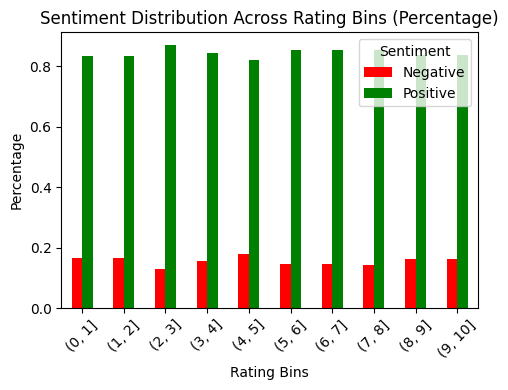

In [60]:
ratings_sentiment_percentages.plot(kind='bar', stacked=False, figsize=(5, 4), color=['red', 'green'])
plt.title('Sentiment Distribution Across Rating Bins (Percentage)')
plt.xlabel('Rating Bins')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Sentiment Distribution Across Rating Bins.png')
plt.show()

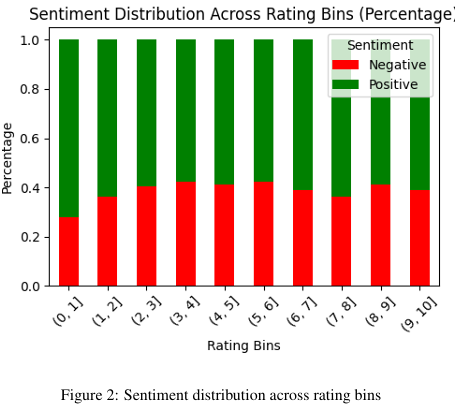

Over the board, it was observed that the entiments were fairly constant. People generally rated the movies to the same extent over the entire rating spectrum. Figure 2 above displays the result of such an outcome.

### Directors and sentiments

Another interesting analysis that came out of sentiment observation is how certain director align themselves with positive toned movies and other directors prefer the darker tone. I have made a venn diagram below to display this (Figure 3).

In [51]:
from matplotlib_venn import venn2, venn2_circles

Get the dataset ready for this part of the analysis

In [52]:
directors_sentiments = pd.merge(data_description, data[['Title', 'Directed by']], on = 'Title')
directors_sentiments.head()

,Title,Description,Sentiment,Sentiment Score,Directed by
0,Dekalog (1988),This masterwork by Krzysztof Kieślowski is one...,Positive,0.999793,Krzysztof Kieslowski
1,Three Colors: Red,Krzysztof Kieslowski closes his Three Colors t...,Positive,0.999765,Krzysztof Kieslowski
2,The Conformist,"Set in Rome in the 1930s, this re-release of B...",Positive,0.996626,Bernardo Bertolucci
3,Tokyo Story,Yasujiro Ozu’s Tokyo Story follows an aging co...,Positive,0.999801,Yasujirô Ozu
4,The Leopard (re-release),"Set in Sicily in 1860, Luchino Visconti's spec...",Positive,0.999763,Luchino Visconti


Put the "Positive" sentiment directors in one dataframe, and "Negative" sentiment directors in another

In [53]:
positive_directors = directors_sentiments.loc[directors_sentiments['Sentiment'] == 'Positive', 'Directed by']
negative_directors = directors_sentiments.loc[directors_sentiments['Sentiment'] == 'Negative', 'Directed by']

Create a set

In [54]:
set_positive_directors = set(positive_directors)
set_negative_directors = set(negative_directors)

Plot the venn diagram of directors:

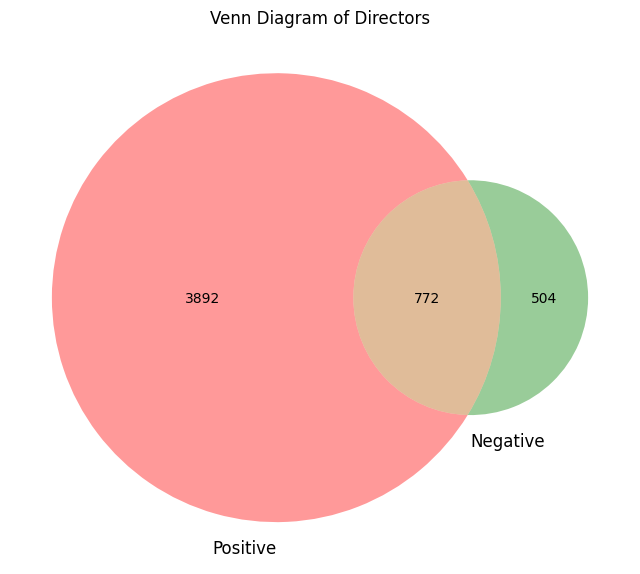

In [55]:
plt.figure(figsize=(8, 8)) 
venn2([set_positive_directors, set_negative_directors], ('Positive', 'Negative')) 
plt.title('Venn Diagram of Directors')
plt.savefig('Venn Diagram of Directors.png')
plt.show()

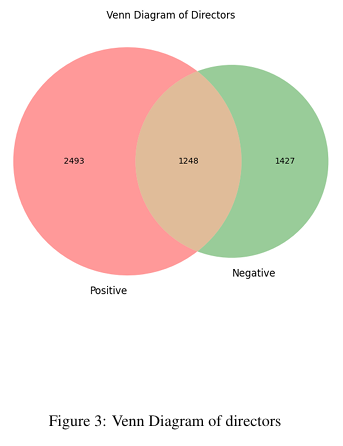

We see there are about 2493 directors who likes to work on Positively toned movies, while about 1427 directors on dark and negatively toned movies.

Some unique directors:

In [56]:
unique_positive_directors = set_positive_directors - set_negative_directors
print(f'Some unique directors who only directed positively toned movies are:\n')
print(list(unique_positive_directors)[:10])

Some unique directors who only directed positively toned movies are:

['Tomm Moore, Ross Stewart', 'Bryan Bertino', 'Hiromasa Yonebayashi', 'Bill Kroyer', 'Asif Kapadia', 'Dylan Baker', 'Harry Bradbeer', 'Erin Lee Carr', 'Madonna', 'Jennifer Baichwal, Edward Burtynsky']


In [57]:
unique_negative_directors = set_negative_directors - set_positive_directors
print(f'Some unique directors who only directed negatively toned movies are:\n')
print(list(unique_negative_directors)[:10])

Some unique directors who only directed negatively toned movies are:

['Simon Barrett, Steven Kostanski, Chloe Okuno, Ryan Prows', 'Neema Barnette', 'Marco Schnabel', 'Flying Lotus', 'Gregory Poirier', 'Mark Neveldine', 'Onur Tukel', 'Eddie Mensore', 'Amy Seimetz', 'Gil Junger']


Some examples of the “Positive” directors are Josh Lawson, Fred Cavay´e, Ken Marino, Michael Dweck, Gregory Kershaw; on the other hand some “Negative” directors are Gerard Johnson, Katie Aselton, Gregg Bishop, Spike Lee, Danya Taymor, Meg Ryan. This gives us an idea of what kind of movies an audience might expect coming from these directors.

## Conclusion

The sentiment analysis provided valuable insights into the emotional/sentiment tones prevalent in different movie description. By leveraging NLP and advanced transformer models, it was possible to quantify from textual concept and visualize these sentiments effectively.

By understanding these trends, industry professionals can better tailor their content and marketing efforts to meet audience expectations, ultimately improving viewer satisfaction and engagement.

## Bibliography

[1] IBM. (2023). What is sentiment analysis? — IBM. www.ibm.com.https://www.ibm.com/topics/sentiment-analysis

[2] Hugging Face. (2024). Hugging Face– On a mission to solve NLP, one commit at a time. https://huggingface.co/

[3] jake3375. (2024, September 5). 16000+ Movies dataset. Kaggle.com; Kaggle. https://www.kaggle.com/code/jake3375/16000-movies-dataset

[4] sarahai/movie-sentiment-analysis · Hugging Face. (2024, January 4). https://huggingface.co/sarahai/movie-sentiment-analysis

[5] Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).